In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import math
import matplotlib.pyplot as plt

## DECAY MODEL(Single compartment)

In [ ]:
class model:
    def __init__(self ,
                 drug_GI: 'Intial drug in intestines',
                 GI_to_blood: 'GI to blood constant',
                 drug_blood: 'initial drug amount in blood stream',
                 n0: 'amount absorbed at regular intervals',
                 alpha: 'absorption_constant',
                 elimination_constant: 'elimination_constant',
                 delta: 'time_step',
                 t1: 'time interval for mulyiple doses',
                 t2: 'time interval of slab',
                 t_final: 'simulation length',
                 label:'Label' = ['Amount of drug in blood']):

      self.n_iter = int(t_final / delta)
      self.drug_blood_approx_single = np.zeros((self.n_iter) , dtype = np.float64)
      self.drug_blood_approx_multiple = np.zeros((self.n_iter) , dtype = np.float64)
      self.drug_blood_approx_slabs = np.zeros((self.n_iter) , dtype = np.float64)
      self.drug_GI_approx = np.zeros((self.n_iter) , dtype = np.float64)
      self.drug_blood_from_GI = np.zeros((self.n_iter) , dtype = np.float64)
      self.drug_blood_from_GI[0]=0
      self.tt = np.zeros((self.n_iter) , dtype = np.float64)
      self.label = label
      self.alpha = alpha
      self.drug_blood=drug_blood
      self.drug_GI=drug_GI

      self.elimination_constant = elimination_constant
      self.delta = delta
      self.t_final = t_final
      self.t2 = int (t2/delta)
      self.t1 = int (t1/delta)
      self.t2 = 2*self.t2
      self.n0 = n0
      self.GI_to_blood = GI_to_blood

      # self.run_single_dose()
      # self.run_multiple_dose()
      # self.run_multiple_slabs()
      # self.run_double_1st()
      # self.run_double_2nd()
      # self.run_d1_doses()
      # self.run_d1_slabs()
      # self.run_d2_doses()
      # self.run_d2_slabs()
      # self.runground()  
    

    def run_single_dose(self):
      excrete_rate = self.elimination_constant * self.delta
      if self.drug_blood==0: 
        self.drug_blood_approx_single[0] = self.n0
      else :
        self.drug_blood_approx_single[0] = self.drug_blood
      for i in range(1,self.n_iter):
        self.drug_blood_approx_single[i] = self.drug_blood_approx_single[i-1] - excrete_rate * self.drug_blood_approx_single[i-1]
        self.tt[i] = self.tt[i-1] + self.delta 
      plt.figure(figsize=(7,6))
      plt.plot(self.tt , self.drug_blood_approx_single , label = self.label[0])
      plt.title( label ='Single dose graph')
      plt.grid()
      plt.show()
      
    def run_multiple_dose(self):
      excrete_rate = self.elimination_constant * self.delta
      if self.drug_blood==0: 
        self.drug_blood_approx_multiple[0] = self.n0*self.alpha
      else :
        self.drug_blood_approx_multiple[0] = self.drug_blood
      for i in range(1,self.n_iter):
        if i%self.t1==0:
          self.drug_blood_approx_multiple[i-1] = (self.n0*self.alpha) + self.drug_blood_approx_multiple[i-1]
        self.drug_blood_approx_multiple[i] = self.drug_blood_approx_multiple[i-1] - excrete_rate * self.drug_blood_approx_multiple[i-1]
        self.tt[i] = self.tt[i-1] + self.delta 
      plt.figure(figsize=(7,6))
      plt.plot(self.tt , self.drug_blood_approx_multiple , label = self.label[0])
      plt.title( label='Multiple dose graph')
      plt.grid()
      plt.show()

    def run_multiple_slabs(self):
      excrete_rate = self.elimination_constant * self.delta
      if self.drug_blood==0: 
        self.drug_blood_approx_slabs[0] = self.n0*self.alpha
      else :
        self.drug_blood_approx_slabs[0] = self.drug_blood
      for i in range(1,self.n_iter):
        if i%self.t2>=0 and i%self.t2<=(self.t2/2):
          self.drug_blood_approx_slabs[i-1] = self.n0*self.alpha + self.drug_blood_approx_slabs[i-1]
        self.drug_blood_approx_slabs[i] = self.drug_blood_approx_slabs[i-1] - excrete_rate * self.drug_blood_approx_slabs[i-1]
        self.tt[i] = self.tt[i-1] + self.delta 
      plt.figure(figsize=(7,6))
      plt.plot(self.tt , self.drug_blood_approx_slabs , label = self.label[0])
      plt.title(label = 'Multiple dose slabs graph')
      plt.grid()
      plt.show()

    def run_d1_simple(self):
      excrete_rate = self.elimination_constant * self.delta
      GI_to_blood_rate = self.GI_to_blood * self.delta
      self.drug_GI_approx[0] = self.drug_GI
      self.drug_blood_from_GI[0]=0
      for i in range(1,self.n_iter):
        self.drug_GI_approx[i] = self.drug_GI_approx[i-1] - GI_to_blood_rate * self.drug_GI_approx[i-1]
        self.drug_blood_from_GI[i] = self.drug_blood_from_GI[i-1] + GI_to_blood_rate * self.drug_GI_approx[i-1] - excrete_rate * self.drug_blood_from_GI[i-1]
        self.tt[i] = self.tt[i-1] + self.delta 
      plt.figure(figsize=(8,6))
      plt.plot(self.tt , self.drug_GI_approx , label = 'Drug in GI')
      plt.plot(self.tt , self.drug_blood_from_GI ,'k--', label = 'Drug in blood')
      plt.title(label = 'Single dose 1st Case')
      plt.legend()
      plt.grid()
      plt.show()

    def run_d1_doses(self):
      excrete_rate = self.elimination_constant * self.delta
      self.drug_blood_from_GI[0]=0
      GI_to_blood_rate = self.GI_to_blood * self.delta
      if self.drug_GI==0: 
        self.drug_GI_approx[0] = self.n0*self.alpha
      else :
        self.drug_GI_approx[0] = self.drug_GI
      for i in range(1,self.n_iter):
        if i%self.t1==0:
          self.drug_GI_approx[i-1] = (self.n0*self.alpha) + self.drug_GI_approx[i-1]
        self.drug_GI_approx[i] = self.drug_GI_approx[i-1] - GI_to_blood_rate * self.drug_GI_approx[i-1]
        self.drug_blood_from_GI[i] = self.drug_blood_from_GI[i-1] + GI_to_blood_rate * self.drug_GI_approx[i-1] - excrete_rate * self.drug_blood_from_GI[i-1]
        self.tt[i] = self.tt[i-1] + self.delta 
      plt.figure(figsize=(8,6))
      plt.plot(self.tt , self.drug_GI_approx , label = 'Drug in GI')
      plt.plot(self.tt , self.drug_blood_from_GI , 'k--',label = 'Drug in blood')
      plt.title(label = 'Mutiple dose 1st Case')
      plt.legend()
      plt.grid()
      plt.show()

    def run_d1_slabs(self):
      excrete_rate = self.elimination_constant * self.delta
      GI_to_blood_rate = self.GI_to_blood * self.delta
      self.drug_blood_from_GI[0]=0
      if self.drug_GI==0: 
        self.drug_GI_approx[0] = self.n0*self.alpha
      else :
        self.drug_GI_approx[0] = self.drug_GI
      for i in range(1,self.n_iter):
        if i%self.t2>=0 and i%self.t2<=(self.t2/2):
          self.drug_GI_approx[i-1] = (self.n0*self.alpha) + self.drug_GI_approx[i-1]
        self.drug_GI_approx[i] = self.drug_GI_approx[i-1] - GI_to_blood_rate * self.drug_GI_approx[i-1]
        self.drug_blood_from_GI[i] = self.drug_blood_from_GI[i-1] + GI_to_blood_rate * self.drug_GI_approx[i-1] - excrete_rate * self.drug_blood_from_GI[i-1]
        self.tt[i] = self.tt[i-1] + self.delta 
      plt.figure(figsize=(8,6))
      plt.plot(self.tt , self.drug_GI_approx , label = 'Drug in GI')
      plt.plot(self.tt , self.drug_blood_from_GI ,'k--', label = 'Drug in blood')
      plt.title(label = 'Mutiple slabs 1st Case')
      plt.legend()
      plt.grid()
      plt.show()

    def run_d2_simple(self):
      excrete_rate = self.elimination_constant * self.delta
      GI_to_blood_rate = self.GI_to_blood * self.delta
      self.drug_GI_approx[0] = 10
      self.drug_blood_from_GI[0]=0
      for i in range(1,self.n_iter):
        self.drug_GI_approx[i] = self.drug_GI_approx[i-1] - GI_to_blood_rate * (self.drug_GI_approx[i-1] - self.drug_blood_from_GI[i-1])
        self.drug_blood_from_GI[i] = self.drug_blood_from_GI[i-1] + GI_to_blood_rate * (self.drug_GI_approx[i-1] - self.drug_blood_from_GI[i-1]) - excrete_rate * self.drug_blood_from_GI[i-1]
        self.tt[i] = self.tt[i-1] + self.delta 
      plt.figure(figsize=(8,6))
      plt.plot(self.tt , self.drug_GI_approx , label = 'Drug in GI')
      plt.plot(self.tt , self.drug_blood_from_GI ,'k--', label = 'Drug in blood')
      plt.title(label = 'Single dose 2nd Case')
      plt.legend()
      plt.grid()
      plt.show()

    def run_d2_doses(self):
      excrete_rate = self.elimination_constant * self.delta
      self.drug_blood_from_GI[0]=0
      GI_to_blood_rate = self.GI_to_blood * self.delta
      if self.drug_GI==0: 
        self.drug_GI_approx[0] = self.n0*self.alpha
      else :
        self.drug_GI_approx[0] = self.drug_GI
      for i in range(1,self.n_iter):
        if i%self.t1==0:
          self.drug_GI_approx[i-1] = (self.n0*self.alpha) + self.drug_GI_approx[i-1]
        self.drug_GI_approx[i] = self.drug_GI_approx[i-1] - GI_to_blood_rate * self.drug_GI_approx[i-1]
        self.drug_blood_from_GI[i] = self.drug_blood_from_GI[i-1] + GI_to_blood_rate * (self.drug_GI_approx[i-1] - self.drug_blood_from_GI[i-1]) - excrete_rate * self.drug_blood_from_GI[i-1]
        self.tt[i] = self.tt[i-1] + self.delta 
      plt.figure(figsize=(8,6))
      plt.plot(self.tt , self.drug_GI_approx , label = 'Drug in GI')
      plt.plot(self.tt , self.drug_blood_from_GI ,'k--', label = 'Drug in blood')
      plt.title(label = 'Multiple dose 2nd Case')
      plt.legend()
      plt.grid()
      plt.show()

    def run_d2_slabs(self):
      excrete_rate = self.elimination_constant * self.delta
      GI_to_blood_rate = self.GI_to_blood * self.delta
      self.drug_blood_from_GI[0]=0
      if self.drug_GI==0: 
        self.drug_GI_approx[0] = self.n0*self.alpha
      else :
        self.drug_GI_approx[0] = self.drug_GI
      for i in range(1,self.n_iter):
        if i%self.t2>=0 and i%self.t2<=(self.t2/2):
          self.drug_GI_approx[i-1] = (self.n0*self.alpha) + self.drug_GI_approx[i-1]
        self.drug_GI_approx[i] = self.drug_GI_approx[i-1] - GI_to_blood_rate * self.drug_GI_approx[i-1]
        self.drug_blood_from_GI[i] = self.drug_blood_from_GI[i-1] + GI_to_blood_rate * (self.drug_GI_approx[i-1] - self.drug_blood_from_GI[i-1]) - excrete_rate * self.drug_blood_from_GI[i-1]
        self.tt[i] = self.tt[i-1] + self.delta 
      plt.figure(figsize=(8,6))
      plt.plot(self.tt , self.drug_GI_approx , label = 'Drug in GI')
      plt.plot(self.tt , self.drug_blood_from_GI ,'k--', label = 'Drug in blood',)
      plt.title(label = 'Multiple slabs 2nd Case')
      plt.legend()
      plt.grid()
      plt.show()

    # def graph(self):
    #   fig,ax =  plt.subplots(1,3, figsize=(20,6))
    #   ax[0].plot(self.tt , self.drug_blood_approx_single , label = self.label[0])
    #   ax[0].legend()
    #   ax[0].title.set_text( 'Single dose graph')
    #   ax[0].grid()
      
    #   ax[1].plot(self.tt , self.drug_blood_approx_multiple , label = self.label[0])
    #   ax[1].legend()
    #   ax[1].title.set_text( 'Multiple dose graph')
    #   ax[1].grid()

    #   ax[2].plot(self.tt , self.drug_blood_approx_slabs , label = self.label[0])
    #   ax[2].legend()
    #   ax[2].title.set_text( 'Multiple slabs graph')
    #   ax[2].grid()

    #   # ax[3].plot(self.tt , self.drug_GI , label = 'Drug in GI')
    #   # ax[3].plot(self.tt , self.drug_blood_from_GI , label = 'Drug in blood')
    #   # ax[3].legend()
    #   # ax[3].title.set_text( 'Double compartment')
    #   # ax[3].grid()
    #   plt.show()

      # def runground(self):
      # for i in range(1,self.n_iter):
      #   self.tt[i] = self.tt[i-1] + self.delta 
      #   self.drug_blood_ground[i] = self.drug_blood_ground[0] * np.exp(-self.decay_A * self.tt[i])
      #   self.nB_ground[i] = (self.decay_A*self.drug_blood_ground[0]/(self.decay_B - self.decay_A))*(np.exp(-self.decay_A*self.tt[i])-np.exp(-self.decay_B*self.tt[i]))
      #   self.nB_ground[i] = self.nB_ground[i] + self.nB_ground[0] * np.exp(-self.decay_B*self.tt[i])

      #   self.nC_ground[i] = (self.decay_A*np.exp(-self.decay_B*self.tt[i]) - self.decay_B*np.exp(-self.decay_A*self.tt[i])) / (self.decay_B - self.decay_A)
      #   self.nC_ground[i] = self.nC_ground[i] - self.nB_ground[0] * np.exp(-self.decay_B*self.tt[i]) + (self.nB_ground[0] + self.nC_ground[0] + 1) 

<html>
<body>
<h4> Single compartment Model</h4> 
<h5> Aspirin</h5>
</body>
</html>

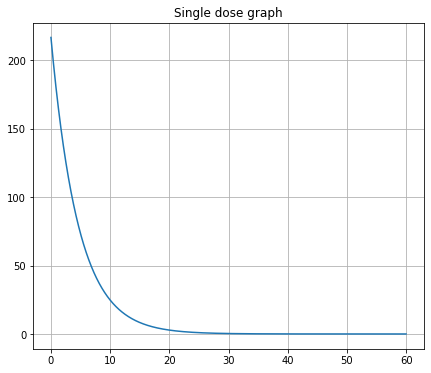

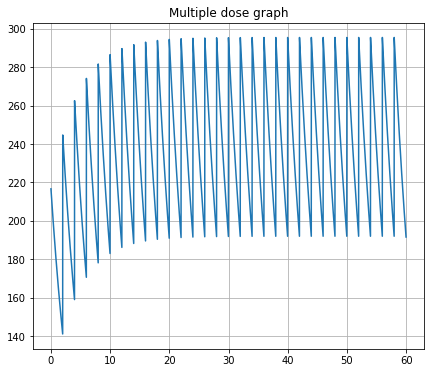

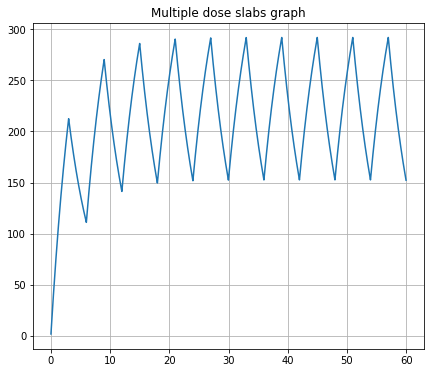

In [ ]:
plasma_volume = 3000 # volume of blood plasma
drug_GI=0
GI_to_blood=0
drug_blood = (2*325*1000)/plasma_volume# float(2*325*1000/plasma_volume) #initial amount of drug in blood stream
alpha= 0.12 # absorption constant for the interval doses = 0.12 (Experimental evidence)
n0 = (8*325*1000)/plasma_volume #drug amount added at intervals (Microggram)
t_half = 3.2 #half_life
elimination_constant = float((0.693147)/t_half)    #elimination rate of drug

delta = 0.01   #time step
t1 = 2      #multiple dose time interval
t2 = 4      #multiple dose slab interval
t_final = 60  #simulation length

s1 = model(drug_GI, GI_to_blood , drug_blood , n0 ,alpha , elimination_constant , delta , t1 , t2 , t_final )
# s.graph()
s1.run_single_dose()
# before running s1.run_multiple_dose() 
# change the inital drug_blood==0 to : 
# if self.drug_blood==0: 
#         self.drug_blood_approx_slabs[0] = self.n0
s1.run_multiple_dose()

s2 = model(drug_GI, GI_to_blood , 0 , (24*1000)/plasma_volume , 0.12 , elimination_constant , delta , t1 , 3 , t_final )
s2.run_multiple_slabs()


<html>
<body>
<h4> Single compartment Model</h4> 
<h5> Dilantin</h5>
</body>
</html>

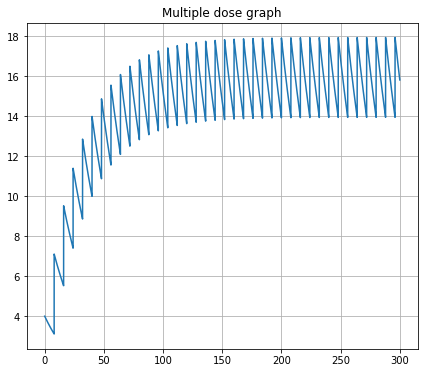

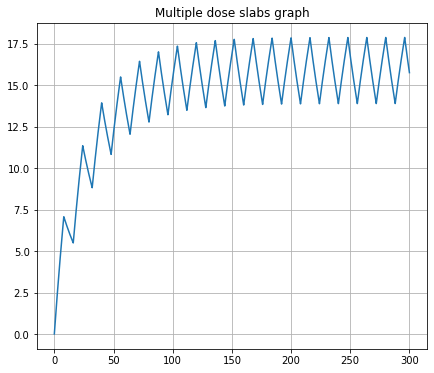

In [ ]:
plasma_volume = 3000 # volume of blood plasma
drug_blood = (100*1000)/plasma_volume# float(2*325*1000/plasma_volume) #initial amount of drug in blood stream
alpha= 0.12 # absorption constant for the interval doses = 0.12 (Experimental evidence)
n0 = (100*1000)/plasma_volume #drug amount added at intervals (Microggram)
t_half = 22 #half_life
elimination_constant = float((0.693147)/t_half)    #elimination rate of drug

delta = 0.01   #time step
t1 = 8      #multiple dose time interval
t2 = 4      #multiple dose slab interval
t_final = 300  #simulation length

s1 = model(drug_GI, GI_to_blood , 0 , n0 ,alpha , elimination_constant , delta , t1 , t2 , t_final )
# s.graph()
# s1.run_single_dose()
s1.run_multiple_dose()
s2 = model(drug_GI, GI_to_blood , 0 , (0.25*1000)/plasma_volume , 0.12 , elimination_constant , delta , t1 , 8 , 300 )
s2.run_multiple_slabs()

<html>
<body>
<h4> Double compartment Model</h4> 
Aspirin
</body>
</html>

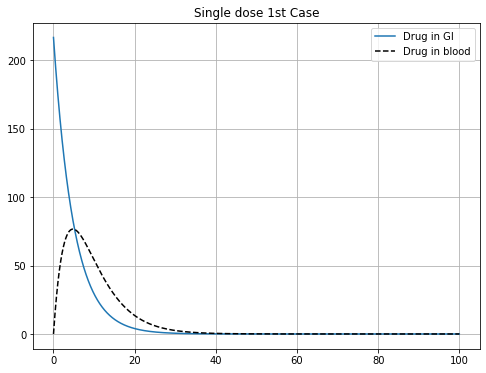

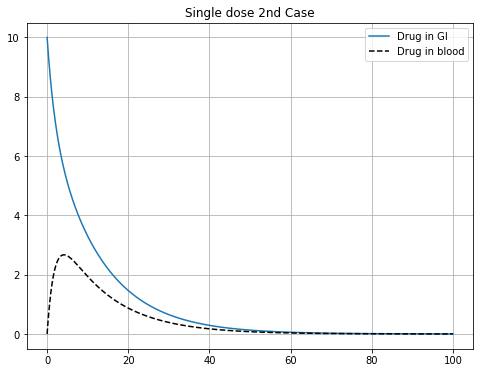

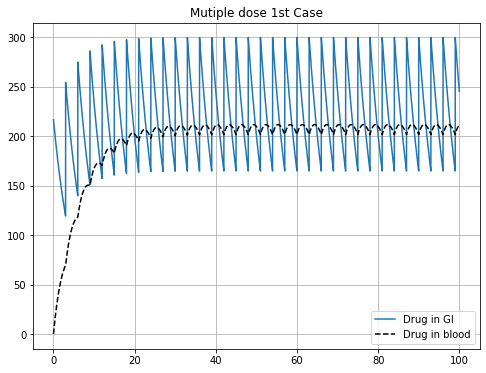

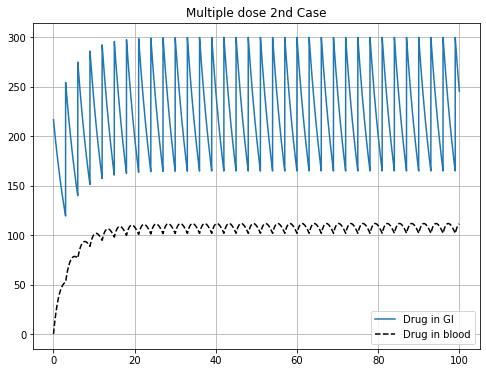

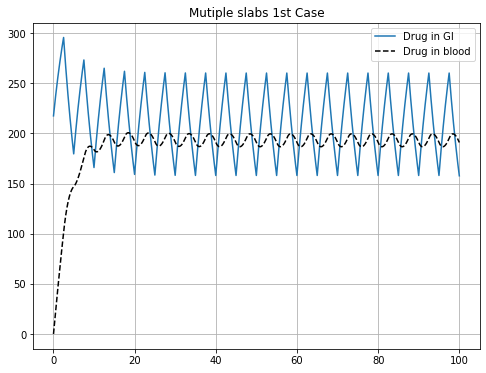

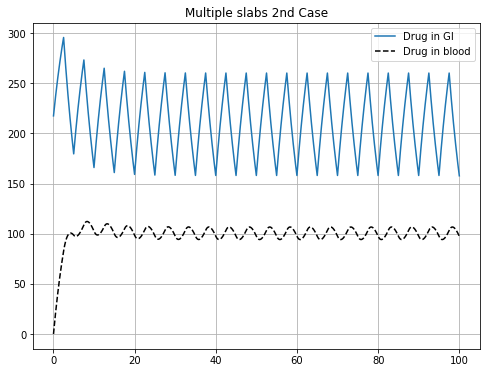

In [ ]:
plasma_volume = 3000 # volume of blood plasma
GI_volume = 3000 # volume of GI
drug_GI = (2*325*1000)/GI_volume  #initial amount in GI tract 
GI_to_blood = 0.2 #GI to blood constant
drug_blood = 0/plasma_volume #initial amount of drug in blood stream
alpha= 0.25 # absorption constant for interval doses
n0 = (10*1000)/GI_volume #drug amount added at intervals
t_half = 3.2 #half_life
elimination_constant = float((0.693147)/t_half)   #elimination rate of drug

delta = 0.01   #time step
t1 = 2     #multiple dose time interval
t2 = 2.5      #multiple dose slab interval
t_final = 100  #simulation length

s2 = model(drug_GI, GI_to_blood , drug_blood , n0  , alpha, elimination_constant , delta , t1 , t2 , t_final )
s2.run_d1_simple()
s2.run_d2_simple()
s3 = model(drug_GI, GI_to_blood , drug_blood , (5*325*1000)/GI_volume  , 0.25, elimination_constant , delta , 3 , t2 , t_final )
s3.run_d1_doses()
s3.run_d2_doses()
s2.run_d1_slabs()
s2.run_d2_slabs()


Double Compartment Model